In [1]:
from simulation_parser import parse_simulation_files
from output_generator import get_velocities
from pdf import data_to_pdf
from plot_generator import plot_multiple_pdf
import numpy as np

In [2]:
lower_limit = 0
upper_limit = 1

In [3]:
input_files = {
    10 : {
        "static"  : "./ej2_2/static-N10.txt",
        "dynamic" : "./ej2_2/dynamic-N10.txt"
    },
    20 : {
        "static"  : "./ej2_2/static-N20.txt",
        "dynamic" : "./ej2_2/dynamic-N20.txt"
    },
    30 : {
        "static"  : "./ej2_2/static-N30.txt",
        "dynamic" : "./ej2_2/dynamic-N30.txt"
    }
}

In [4]:
limits = (lower_limit, upper_limit)

In [5]:
sim_infos = dict()

for N in input_files.keys():
    sim_infos[N] = parse_simulation_files(input_files[N]["static"], input_files[N]["dynamic"])

In [6]:
velocities = dict()

for N in sim_infos.keys():
    velocities[N] = get_velocities(sim_infos[N], limits)
    velocities[N] = np.reshape(velocities[N], velocities[N].size)

In [7]:
pdf         = dict()
values      = dict()
class_width = dict() 

for N in velocities.keys():
    pdf[N], values[N], class_width[N] = data_to_pdf(velocities[N], (9, 12))

In [8]:
for N in pdf.keys():
    print(N, "(area):", np.sum(pdf[N] * class_width[N]))

10 (area): 1.0
20 (area): 1.0
30 (area): 1.0


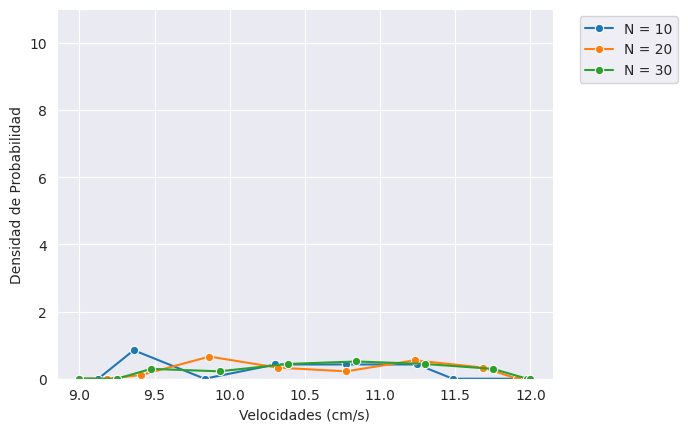

In [9]:
plot_multiple_pdf(list(values.values()), list(pdf.values()), ["N = " + str(N) for N in pdf.keys()], ylim=(0, 11))